# Installing the required packages

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
import gensim

In [ ]:
print(gensim.__version__)

4.2.0


In [ ]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 15.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers 
from sklearn import preprocessing

# Read Dataset

In [ ]:
main = pd.read_csv('/content/drive/MyDrive/Clickbait/Text_Dataset/Main_Dataset.csv')
val = pd.read_csv('/content/drive/MyDrive/Clickbait/Text_Dataset/Validation_Dataset.csv')

In [ ]:
df= main.append(val, ignore_index=True)

In [ ]:
df.head()

,postMedia,postText,id,targetCaptions,targetParagraphs,targetTitle,postTimestamp,targetKeywords,targetDescription,truthJudgments,truthMean,truthClass,truthMedian,truthMode
0,['media/photo_858153570478305281.jpg'],"[""Malls are dying, but it's hard to profit fro...",858153572571197440,[],['Lisa Abramowicz is a Bloomberg Gadfly column...,This Big Short Threatens to Be a Big Bust,Sat Apr 29 02:58:50 +0000 2017,"Infrastructure,Debt,Real Estate,Fund Manager,W...","The wager worked early on, but time is working...","[0.33333333330000003, 0.0, 0.6666666666000001,...",0.333333,no-clickbait,0.333333,0.333333
1,['media/photo_858137808657108992.jpg'],['The top 10 best selling comic books of all t...,858137811039465472,[],"['More', 'By Brian Prowse-Gany', 'In celebrati...",The top 10 best selling comic books of all tim...,Sat Apr 29 01:56:12 +0000 2017,NaN,"In celebration of National Superhero Day, Yaho...","[0.6666666666000001, 1.0, 1.0, 0.0, 1.0]",0.733333,clickbait,1.000000,1.000000
2,['media/photo_858069152451354625.jpg'],"['Players to know, QBs to watch and more 👀\n\n...",858070460814184448,['NFL Draft logo'],['The first round of the 2017 NFL draft was no...,B/R Presents: NFL1000 Guide to Day 2 of the 20...,Fri Apr 28 21:28:34 +0000 2017,"NFL Draft, NFL, Preview Prediction",The first round of the 2017 NFL draft was no...,"[1.0, 0.6666666666000001, 0.6666666666000001, ...",0.600000,clickbait,0.666667,0.666667
3,['media/photo_858033549995376641.jpg'],['Florida officials say no Zika virus has been...,858033553468252160,['PHOTO: A mosquito is pictured on a persons a...,"['With summer approaching, Florida health offi...",No Zika detected in Florida mosquitoes so far ...,Fri Apr 28 19:01:55 +0000 2017,"zika, florida, mosquitoes, health news, medica...","With summer approaching, officials are hoping ...","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,no-clickbait,0.000000,0.000000
4,['media/photo_857902230321725440.jpg'],['White House reporter @alivitali on her first...,857902233232527360,"['TODAY', 'Image: NBC News reporter Ali Vitali...",['The most consistent thing about my life for ...,My 100 Days of Covering President Donald Trump,Fri Apr 28 10:20:06 +0000 2017,NaN,"For the past 100 days, my ""office"" has been th...","[0.33333333330000003, 0.0, 0.6666666666000001,...",0.533333,clickbait,0.666667,0.666667


In [ ]:
text = df['targetTitle'].values         # Input Feature (Title of media posts)
labels = df['truthClass'].values        # Target Class/label

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(text, labels,test_size=0.33, random_state=0)

In [ ]:
X_train

array(['5 travel credit card sign-up bonuses to fund your summer trip',
       '17 Limited-Edition Beauty Products You Need To Buy\xa0ASAP',
       'After Pre-Election Surge, Apprehensions at Southern Border Hit Five-Year Low',
       ...,
       '4 Ways Entrepreneurs Can Use Technology To Stay Fit On The Road',
       "Beliebers Can't Get Over Justin Bieber's Four Grammy Nominations: See Their Tweets",
       "Parents Welcome New Year's Twins Born Minutes Apart, in Different Years "],
      dtype=object)

# FastText Embedding

In [ ]:
# Train the Fasttext model
fasttext_model = gensim.models.FastText(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [ ]:
words = set(fasttext_model.wv.index_to_key )
X_train_vect = np.array([np.array([fasttext_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([fasttext_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [ ]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

# Encoding Target Variable

In [ ]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_train_en= label_encoder.fit_transform(y_train)

y_test_en = label_encoder.transform(y_test)

target_length = y_train_en.shape

In [ ]:
X_train.shape

(14206,)

In [ ]:
X_train_vect_avg[0].shape

(100,)

In [ ]:
X_train_vect_avg=np.array(X_train_vect_avg)
X_train_vect_avg = X_train_vect_avg[:, np.newaxis]

In [ ]:
X_train_vect_avg.shape

(14206, 1, 100)

# CNN

In [ ]:
cnn = Sequential()
cnn.add(layers.Dense(100, activation='relu',input_shape=X_train_vect_avg[0].shape ))
cnn.add(layers.Conv1D(64, 1, activation='relu'))
cnn.add(layers.GlobalMaxPooling1D())
cnn.add(layers.Dense(10, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))
cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnn.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 100)            10100     
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             6464      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,225
Trainable params: 17,225
Non-trainable params: 0
____________________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)

history = cnn.fit(X_train_vect_avg, y_train_en, epochs=5, 
                    validation_split=0.3, 
                    batch_size=128, callbacks=[callback])

Epoch 1/5
78/78 [==============================] - 2s 9ms/step - loss: 0.5286 - accuracy: 0.7786 - val_loss: 0.5236 - val_accuracy: 0.7715
Epoch 2/5
78/78 [==============================] - 0s 5ms/step - loss: 0.5011 - accuracy: 0.7871 - val_loss: 0.5083 - val_accuracy: 0.7715
Epoch 3/5
78/78 [==============================] - 0s 6ms/step - loss: 0.4875 - accuracy: 0.7883 - val_loss: 0.4951 - val_accuracy: 0.7759
Epoch 4/5
78/78 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.7915 - val_loss: 0.4800 - val_accuracy: 0.7825
Epoch 5/5
78/78 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.7935 - val_loss: 0.4778 - val_accuracy: 0.7884


# Testing and Prediction

In [ ]:
X_test_vect_avg=np.array(X_test_vect_avg)
X_test_vect_avg = X_test_vect_avg[:, np.newaxis]

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = cnn.predict(X_test_vect_avg)

219/219 [==============================] - 1s 2ms/step


In [ ]:
y_pred

array([[0.8849859 ],
       [0.8154222 ],
       [0.88860995],
       ...,
       [0.54659057],
       [0.79063547],
       [0.75150794]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test_en, y_pred)
recall = recall_score(y_test_en, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test_en).sum()/len(y_pred), 3)))

Precision: 0.802 / Recall: 0.973 / Accuracy: 0.793


# Confusion Matrix

accuracy: 0.793


<Figure size 432x288 with 0 Axes>

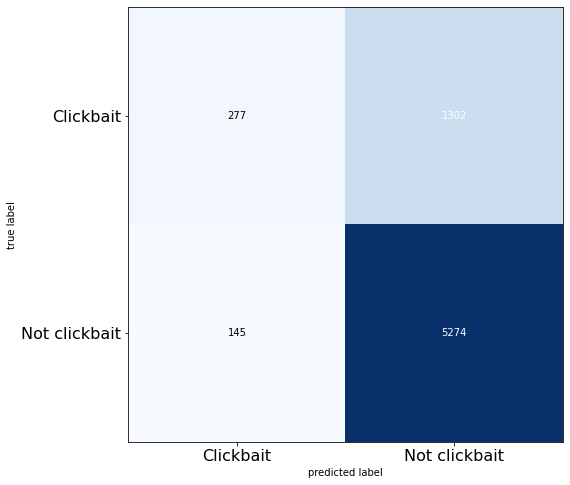

In [ ]:
accuracy=metrics.accuracy_score(y_test_en,y_pred)
print('accuracy: %0.3f'%accuracy)
cm=metrics.confusion_matrix(y_test_en, y_pred)

plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Clickbait','Not clickbait'], fontsize=16)
plt.yticks(range(2), ['Clickbait','Not clickbait'], fontsize=16)
plt.show()

# Accuracy Plot

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_en, y_pred, target_names=['Clickbait','Not clickbait']))

               precision    recall  f1-score   support

    Clickbait       0.66      0.18      0.28      1579
Not clickbait       0.80      0.97      0.88      5419

     accuracy                           0.79      6998
    macro avg       0.73      0.57      0.58      6998
 weighted avg       0.77      0.79      0.74      6998

